# Exploring the data

9th October 2023

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import sys
sys.path.append( '/Users/kenzatazi/Documents/CDT/Code')
from load import cordex 

In [2]:
%load_ext autoreload
%autoreload

In [4]:
hist_CSIRO

<xarray.Dataset>
Dimensions:    (time: 300, lon: 195, lat: 124, bnds: 2)
Coordinates:
  * time       (time) datetime64[ns] 1976-01-01 1976-02-01 ... 2005-12-01
  * lon        (lon) float64 19.25 19.75 20.25 20.75 ... 114.8 115.2 115.8 116.2
  * lat        (lat) float64 -15.75 -15.25 -14.75 -14.25 ... 44.75 45.25 45.75
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object 1976-01-01 00:00:00 ... 2006-01-01 00:00:00
    tp         (time, lat, lon) float32 1.11 1.288 2.286 ... 0.3072 0.268 0.2883
Attributes: (12/21)
    institution:                    Indian Institute of Tropical Meteorology,...
    Conventions:                    CF-1.4
    contact:                        sanjay@tropmet.res.in
    experiment:                     historical run with CSIRO-QCCCE-CSIRO-Mk3...
    experiment_id:                  historical
    driving_experiment:             CSIRO-QCCCE-CSIRO-Mk3-6-0, historical, r1...
    ...                             ...
    references:                     http://gforge.ictp.it/gf/project/regcm
    creation_date:                  2016-02-01-T15:26:21Z
    frequency:                      mon
    CORDEX_domain:                  WAS-44i
    tracking_id:                    d24d3c47-a99a-471d-83d6-acea97671591
    plot_legend:                    CORDEX WAS CSIRO IITM-RegCM4-4 historical

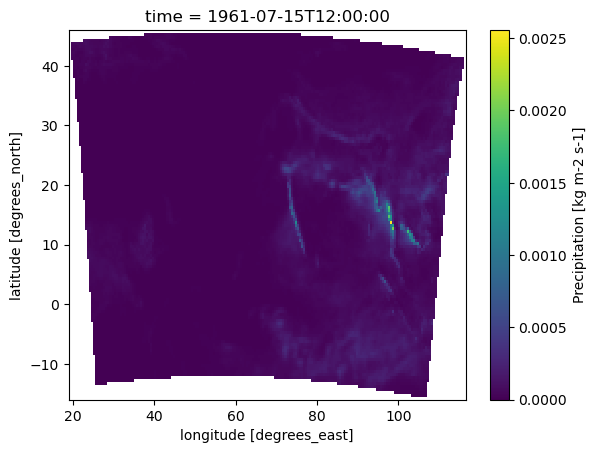

In [12]:
da.isel(time=6).pr.plot()


In [13]:
da_sel = da.sel(lat=slice(20, 40), lon=slice(60, 105))

<xarray.Dataset>
Dimensions:  (lon: 90, lat: 40, time: 120)
Coordinates:
  * lon      (lon) float64 65.25 65.75 66.25 66.75 ... 108.2 108.8 109.2 109.8
  * lat      (lat) float64 22.25 22.75 23.25 23.75 ... 40.25 40.75 41.25 41.75
  * time     (time) datetime64[ns] 1961-01-15T12:00:00 ... 1970-12-15T12:00:00
Data variables:
    pr       (time, lat, lon) float32 ...
Attributes: (12/24)
    CDI:                            Climate Data Interface version 1.6.4 (htt...
    source:                         REMO
    institution:                    Helmholtz-Zentrum Geesthacht, Climate Ser...
    Conventions:                    CF-1.4
    contact:                        csc-anfragen@hzg.de
    comment:                        CORDEX SouthAsia MPI-CSC-REMO2009 0.44 de...
    ...                             ...
    references:                     http://www.remo-rcm.de
    NCO:                            4.0.3
    CDO:                            Climate Data Operators version 1.6.4 (htt...
    CORDEX_domain:                  WAS-44i
    creation_date:                  2014-08-28T17:14:50Z
    tracking_id:                    d6102797-1f2e-4eed-af21-1b501133b0aa

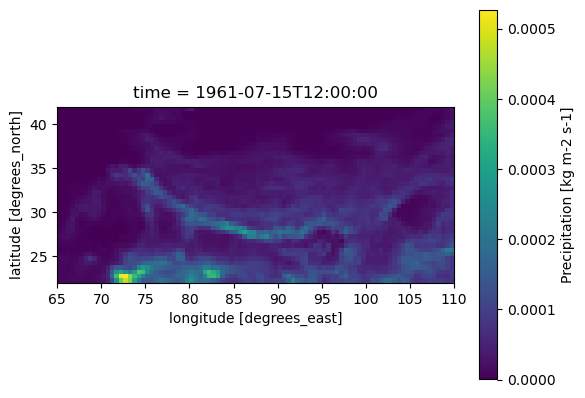

In [31]:
da_sel.isel(time=6).pr.plot()
plt.gca().set_aspect('equal')
da_sel_clean = da_sel.isel(nb2=0).drop_vars('time_bnds')
da_sel_clean

## Divide into domains

In [32]:
da_sel_d61 = da_sel.sel(time=slice('1961-01', '1961-12'))
da_sel_d62 = da_sel.sel(time=slice('1962-01', '1962-12'))
da_sel_d63 = da_sel.sel(time=slice('1963-01', '1963-12'))

In [35]:
df61 = da_sel_d61.to_dataframe().reset_index()
df62 = da_sel_d62.to_dataframe().reset_index()
df63 = da_sel_d63.to_dataframe().reset_index()

In [36]:
df61


,lon,lat,time,pr
0,65.25,22.25,1961-01-15 12:00:00,2.310115e-07
1,65.25,22.25,1961-02-15 12:00:00,5.706844e-07
2,65.25,22.25,1961-03-15 12:00:00,1.790159e-06
3,65.25,22.25,1961-04-15 12:00:00,2.486549e-06
4,65.25,22.25,1961-05-15 12:00:00,1.248272e-06
...,...,...,...,...
43195,109.75,41.75,1961-08-15 12:00:00,7.489597e-06
43196,109.75,41.75,1961-09-15 12:00:00,2.061901e-06
43197,109.75,41.75,1961-10-15 12:00:00,3.973113e-06
43198,109.75,41.75,1961-11-15 12:00:00,2.881260e-06


In [37]:
df61.to_csv('pr_WAS-44i_MPI-M-MPI-ESM-LR_historical_r1i1p1_MPI-CSC-REMO2009_v1_mon_1961.csv')
df62.to_csv('pr_WAS-44i_MPI-M-MPI-ESM-LR_historical_r1i1p1_MPI-CSC-REMO2009_v1_mon_1962.csv')
df63.to_csv('pr_WAS-44i_MPI-M-MPI-ESM-LR_historical_r1i1p1_MPI-CSC-REMO2009_v1_mon_1963.csv')

In [5]:
# Open more data
dir = '/Users/kenzatazi/Documents/CDT/Code/data/'
ds1 = xr.open_dataset(
    dir + 'CORDEX/WAS/mon/pr_WAS-44i_MPI-M-MPI-ESM-LR_historical_r1i1p1_MPI-CSC-REMO2009_v1_mon_196101-197012.nc')
ds2 = xr.open_dataset(
    dir + 'CORDEX/WAS/mon/pr_WAS-44i_MPI-M-MPI-ESM-MR_historical_r1i1p1_IITM-RegCM4-4_v5_mon_196101-196512.nc')

In [16]:
import pandas as pd

In [40]:
def process_data(path):
    da = xr.open_dataset(path)
    da_sel = da.sel(lat=slice(20, 40), lon=slice(60, 105))
    if 'nb2' in da_sel.dims:
        da_sel_clean = da_sel.isel(nb2=0).drop_vars('time_bnds')
    else:
        da_sel_clean = da_sel.isel(bnds=0).drop_vars('time_bnds')
    df = da_sel_clean.to_dataframe().reset_index()
    paths = path.split('/')
    df['time'] = df['time'].to_numpy().astype('datetime64[M]')
    df['pr'] *= 86400
    df.to_csv('data/processed/' + paths[-1][:-2]+'csv')
    return df

In [43]:
df = process_data(
    dir + 'CORDEX/WAS/mon/pr_WAS-44i_MPI-M-MPI-ESM-LR_historical_r1i1p1_MPI-CSC-REMO2009_v1_mon_196101-197012.nc')


In [44]:
df.max()


lon                  104.75
lat                   39.75
time    1970-12-01 00:00:00
pr               139.058419
dtype: object

In [1]:
import sys

In [3]:
sys.path.append(
    '/Users/kenzatazi/Documents/CDT/Code/')
from load import aphrodite
#from load import location_sel

aphrodite.merge_og_files()

ds_aphro= aphrodite.collect_APHRO('hma', minyear='1961', maxyear='1962')

1951-2007


100%|██████████| 57/57 [00:16<00:00,  3.56it/s]


2007-2016


100%|██████████| 9/9 [00:03<00:00,  2.44it/s]


In [4]:
import xarray as xr
xr.open_dataset('/Users/kenzatazi/Documents/CDT/Code/data/APHRODITE/aphrodite_hma_1951_2016.nc')

<xarray.Dataset>
Dimensions:  (lon: 200, lat: 88, time: 780)
Coordinates:
  * lon      (lon) float64 60.12 60.38 60.62 60.88 ... 109.1 109.4 109.6 109.9
  * lat      (lat) float64 20.12 20.38 20.62 20.88 ... 41.12 41.38 41.62 41.88
  * time     (time) datetime64[ns] 1951-01-01 1951-02-01 ... 2015-12-01
Data variables:
    tp       (time, lat, lon) float32 ...
Attributes:
    long_name:          daily precipitation analysis interpolated onto 0.25de...
    units:              mm/day
    level_description:  Earth surface

## Open dataset pipeline

In [10]:
hist_CSIRO = cordex.collect_CORDEX(domain='WAS', minyear='1976', maxyear='2006', experiment='historical', rcm_model='IITM-RegCM4-4', gcm_model='CSIRO', freq='mon')
df1 = hist_CSIRO.sel(lat=slice(20, 40), lon=slice(60, 105)).to_dataframe().reset_index()
df1.to_csv('data/processed/hist_CSIRO_IITM-RegCM4-4.csv')

In [3]:
hist_MPI_REMO = cordex.collect_CORDEX(domain='WAS', minyear='1976', maxyear='2006',
                                   experiment='historical', rcm_model='REMO2009', gcm_model='MPI', freq='mon')
df2 = hist_MPI_REMO.sel(lat=slice(20, 40), lon=slice(
    59., 105)).to_dataframe().reset_index()
df2.to_csv('data/processed/hist_MPI_REMO2009.csv')

In [5]:
hist_MPI_IITM = cordex.collect_CORDEX(domain='WAS', minyear='1976', maxyear='2006',
                                      experiment='historical', rcm_model='IITM-RegCM4-4', gcm_model='MPI', freq='mon')
df3 = hist_MPI_IITM.sel(lat=slice(20, 40), lon=slice(60, 105)).to_dataframe().reset_index()                                 
df3.to_csv('data/processed/hist_MPI_IITM-RegCM4-4.csv')

In [6]:
print(hist_MPI_REMO)
print(hist_MPI_IITM)
print(hist_CSIRO)

<xarray.Dataset>
Dimensions:    (lon: 195, lat: 124, time: 360, nb2: 2)
Coordinates:
  * lon        (lon) float64 19.25 19.75 20.25 20.75 ... 114.8 115.2 115.8 116.2
  * lat        (lat) float64 -15.75 -15.25 -14.75 -14.25 ... 44.75 45.25 45.75
  * time       (time) datetime64[ns] 1976-01-01 1976-02-01 ... 2005-12-01
Dimensions without coordinates: nb2
Data variables:
    time_bnds  (time, nb2) datetime64[ns] 1976-01-01 1976-02-01 ... 2006-01-01
    tp         (time, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan
Attributes: (12/25)
    CDI:                            Climate Data Interface version 1.6.4 (htt...
    source:                         REMO
    institution:                    Helmholtz-Zentrum Geesthacht, Climate Ser...
    Conventions:                    CF-1.4
    contact:                        csc-anfragen@hzg.de
    comment:                        CORDEX SouthAsia MPI-CSC-REMO2009 0.44 de...
    ...                             ...
    NCO:                   

In [7]:
CSIRO.time

NameError: name 'CSIRO' is not defined

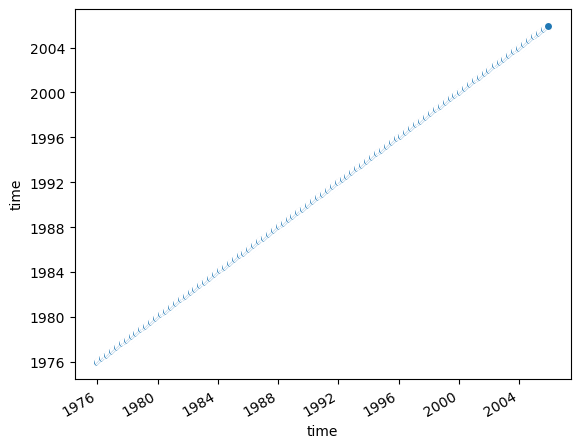

In [11]:
hist_CSIRO.time.plot.scatter()